# From Biological to Artificial Neurons

## The Perceptron

* The perceptron is one of the simplest ANN architectures, invented in 1957 by Frank Rosenblatt. It is based on a slightly different artificial neuron called a threshold logic unit (TLU), or sometimes a linear threshold unit (LTU).

* Scikit-Learn provides a Perceptron class that can be used pretty much as you would expect—for example, on the iris dataset

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 0) # Iris setosa

per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)

X_new = [[2, 0.5], [3, 1]]
y_pred = per_clf.predict(X_new) # predicts True and False for these 2 flowers

In [2]:
y_pred

array([ True, False])

## Regression MLPs

In [3]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [4]:
housing = fetch_california_housing()

In [5]:
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data,
    housing.target,
    random_state=42
)

In [6]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full,
    y_train_full,
    random_state=42
)

In [7]:
mlp_reg = MLPRegressor(
    hidden_layer_sizes=[50, 50, 50],
    random_state=42
)

In [8]:
pipeline = make_pipeline(
    StandardScaler(),
    mlp_reg
)

In [9]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_valid)

In [10]:
rmse = root_mean_squared_error(y_valid, y_pred)

In [11]:
rmse

0.5053326657967967

## Classification MLPs

In [12]:
from sklearn.datasets import load_iris
A = load_iris()

In [13]:
X_train, X_test, y_train, y_test = train_test_split(A.data, A.target, random_state=42)

In [14]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

mlp_clf = MLPClassifier(
    hidden_layer_sizes=[5,8],
    max_iter=500,
    random_state=42,
    verbose = True,
    alpha=0.01,
    early_stopping=True
)

pipeline = make_pipeline(
    StandardScaler(),
    mlp_clf
)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)


acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

Iteration 1, loss = 0.90357396
Validation score: 0.333333
Iteration 2, loss = 0.90026353
Validation score: 0.333333
Iteration 3, loss = 0.89697773
Validation score: 0.333333
Iteration 4, loss = 0.89371710
Validation score: 0.333333
Iteration 5, loss = 0.89049354
Validation score: 0.333333
Iteration 6, loss = 0.88729736
Validation score: 0.333333
Iteration 7, loss = 0.88412733
Validation score: 0.333333
Iteration 8, loss = 0.88098044
Validation score: 0.333333
Iteration 9, loss = 0.87786561
Validation score: 0.333333
Iteration 10, loss = 0.87478224
Validation score: 0.333333
Iteration 11, loss = 0.87170958
Validation score: 0.333333
Iteration 12, loss = 0.86867681
Validation score: 0.333333
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


In [15]:
acc

0.5

In [16]:
cm

array([[15,  0,  0],
       [ 7,  4,  0],
       [ 2, 10,  0]], dtype=int64)

# Implementing MLPs with Keras

## Building an Image Classifier Using the Sequential API

In [17]:
from tensorflow import keras
print(keras.__version__)

3.7.0


### Using Keras to load the dataset

In [18]:
import tensorflow as tf
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

In [44]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist

X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

* Let's look data shapes & types

In [45]:
X_train.shape

(55000, 28, 28)

In [46]:
X_train.dtype

dtype('uint8')

* For simplicity, we’ll scale the pixel intensities down to the 0–1 range by dividing them by 255.0 (this also converts them to floats)

In [47]:
X_train, X_valid, X_test = X_train/255.0, X_valid/255.0, X_test/255.0

In [48]:
print(X_valid.shape)


(5000, 28, 28)


* With MNIST, when the label is equal to 5, it means that the image represents the handwritten digit 5. Easy. For Fashion MNIST, however, we need the list of class names to know what we are dealing with:

In [49]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

* For example, the first image in the training set represents an ankle boot:

In [50]:
class_names[y_train[0]]

'Ankle boot'

### Creating the model using the sequential API

* Now let’s build the neural network! Here is a classification MLP with two hidden layers

In [51]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[28, 28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu")) #Hidden 1
model.add(tf.keras.layers.Dense(100, activation="relu")) #Hidden 2
model.add(tf.keras.layers.Dense(10, activation="softmax"))

* Instead of adding the layers one by one as we just did, it’s often more convenient to pass a list of layers when creating the Sequential model. You can also drop the Input layer and instead specify the input_shape in the first layer:

In [26]:
##model = tf.keras.Sequential(
#    [
##        tf.keras.layers.Input(shape=[28, 28]),
#        tf.keras.layers.Dense(300, activation="relu"), #Hidden 1
#        tf.keras.layers.Dense(100, activation="relu"), #Hidden 2
#        tf.keras.layers.Dense(10, activation="softmax")
#    ]
#)

* The model’s summary() method displays all the model’s layers,⁠ including each layer’s name (which is automatically generated unless you set it when creating the layer), its output shape (None means the batch size can be anything), and its number of parameters. The summary ends with the total number of parameters, including trainable and non-trainable parameters. Here we only have trainable parameters..

In [52]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

* Note that Dense layers often have a lot of parameters. For example, the first hidden layer has 784 × 300 connection weights, plus 300 bias terms, which adds up to 235,500 parameters! This gives the model quite a lot of flexibility to fit the training data, but it also means that the model runs the risk of overfitting, especially when you do not have a lot of training data.

* You can easily get a model’s list of layers using the layers attribute, or use the get_layer() method to access a layer by name:

In [53]:
model.layers

[<Flatten name=flatten_1, built=True>,
 <Dense name=dense_3, built=True>,
 <Dense name=dense_4, built=True>,
 <Dense name=dense_5, built=True>]

In [54]:
hidden1 = model.layers[1]
hidden1.name

'dense_3'

In [56]:
model.get_layer('dense_3') is hidden1

True

In [57]:
weights, biases = hidden1.get_weights()

In [58]:
weights

array([[ 5.2190140e-02, -3.9034702e-02, -4.4065475e-02, ...,
         3.3071190e-03,  1.7897785e-04,  2.3451664e-02],
       [ 2.5401846e-02,  8.3386526e-03,  4.5182273e-02, ...,
        -3.5688579e-03,  1.3598070e-02,  3.6383718e-03],
       [-1.8240295e-02,  7.0012823e-02, -5.2711651e-02, ...,
        -2.6511509e-02,  8.0307797e-03,  5.0651759e-02],
       ...,
       [-4.1777506e-02,  7.1854711e-02,  2.7908452e-02, ...,
        -3.2600190e-02,  7.4069887e-02, -1.2440339e-02],
       [-6.3809767e-02, -1.8757265e-02,  5.9228793e-02, ...,
        -6.9733769e-02, -6.4202286e-02, -4.1775405e-05],
       [-4.6021178e-02,  3.3481136e-02, -2.1656785e-02, ...,
        -5.4241508e-02,  6.0489967e-02,  1.8913306e-02]], dtype=float32)

In [59]:
weights.shape

(784, 300)

In [60]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [61]:
biases.shape

(300,)

## Compiling the model

In [62]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer = "sgd",
    metrics=["accuracy"]
)

### Training and evaluating the model

In [63]:
history = model.fit(X_train, y_train, epochs=30,validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.6966 - loss: 0.9717 - val_accuracy: 0.8306 - val_loss: 0.5017
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.8277 - loss: 0.5045 - val_accuracy: 0.8432 - val_loss: 0.4505
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 25s 14ms/step - accuracy: 0.8427 - loss: 0.4520 - val_accuracy: 0.8494 - val_loss: 0.4254
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 48s 18ms/step - accuracy: 0.8529 - loss: 0.4219 - val_accuracy: 0.8544 - val_loss: 0.4107
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 35s 15ms/step - accuracy: 0.8603 - loss: 0.4001 - val_accuracy: 0.8554 - val_loss: 0.3990
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.8662 - loss: 0.3826 - val_accuracy: 0.8602 - val_loss: 0.3879
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.8707 - loss: 0.3677 - val_accuracy: 0.8642 - val_loss: 0.3805
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.8748 -

* The fit() method returns a History object containing the training parameters (history.params), the list of epochs it went through (history.epoch), and most importantly a dictionary (history.history) containing the loss and extra metrics it measured at the end of each epoch on the training set and on the validation set (if any). If you use this dictionary to create a Pandas DataFrame and call its plot() method, you get the learning curves

<Axes: xlabel='Epoch'>

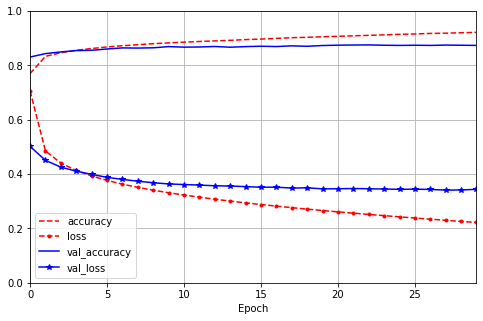

In [64]:
import matplotlib.pyplot as plt
import pandas as pd
pd.DataFrame(history.history).plot(
    figsize=(8, 5),
    xlim=[0, 29],
    ylim=[0, 1],
    grid=True,
    xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"]
)

In [65]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.8723 - loss: 0.3649


[0.36494046449661255, 0.8738999962806702]